In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'scroll': True,
})


{u'scroll': True}

In [2]:
%%javascript
Jupyter.notebook.config.update({"load_extensions":{"calico-spell-check":true,
                                                  "calico-document-tools":true,
                                                  "calico-cell-tools":true}})

<IPython.core.display.Javascript object>

# A short introduction to matplotlib    


## What is matplotlib? 

matplotlib is a powerful Python based plotting library with full support for 2D and limited (meaning almost no) support for 3D plotting.

## What matplotlib is not 

A djinni that displays your data in a nice way.<br/>
Data visualisation is difficult, however matplotlib provides many tools to aid you

#  Architecture

matplotlib is structured in layers, the layers in order of increasing abstraction are:

* Backend Layer

* Artist Layer

* Scripting Layer

We will first treat the scripting layer, and than have a look at the artist layer.

# Scripting Layer 

matplotlibs scrpting layer is very powerfull and easy to use but ...


__It comes at price__

![sith](sith.jpg)

Doing all the small things wich make your plots look really good is more difficult using the scripting layer

The same is true for editing large and _organically_ grown plotting scripts.

In [3]:
import warnings 
warnings.filterwarnings('ignore',message='You should import from ipykernel or jupyter_client instead.')

## Pyplot

The scripting interface lies in a submodule pyplot, so the first line of most plotting scripts is
```python
from matplotlib import pyplot as plt
```

pyplot provides a number of plotting functions the most notorius beeing:

* plt.plot
    The most basic plotting command. Data points are connected by lines.

* plt.scatter
    A scatter plot that alows changing the size and color of data points more easily.

* plt.hist and plt.hist2d
    One and two D histograms.

* plt.imshow
    Display an image or matrix.

Many other, more specialized plotting functions can be found at the matplotlib beginners guide.<br/>
To get an idea that is possible have a look at gallery.

## Work flow

* start with a matplotlib figure, think of it as your sheet of paper or page in your sketch book
* repeat untill scientist satisfied
    * add an entity (image, plot, ...) to that page
    * modify that entity

## First example

<IPython.core.display.Javascript object>


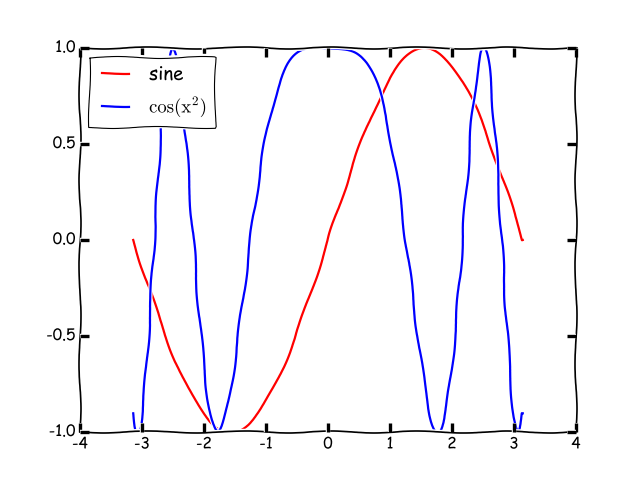

In [1]:
#some unimportant magic, eg. display interactive image
%matplotlib nbagg 
import numpy as np
#import matplotlib as mpl
#notice the import
from matplotlib import pyplot as plt
plt.xkcd() #use xkcd style plotting to lighten the mood
#generate some data
x = np.linspace(-np.pi,np.pi,1000)
#create a plot
#if there is no figure this implicitly creates an empty one and puts the plot into it
plt.plot(x,np.sin(x),'r',label='sine')
plt.plot(x,np.cos(x**2),"b",label=r'$\rm{cos}(x^2)$')
plt.savefig('./bla.svg')
#plt.clf 

now add some stuff to explain this plot

<IPython.core.display.Javascript object>


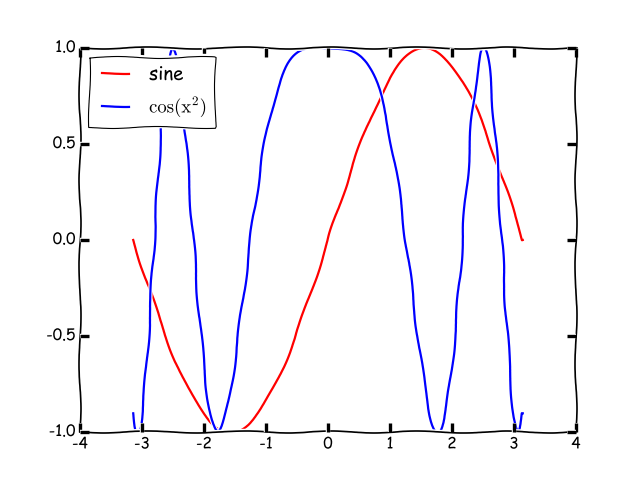

In [2]:
plt.gcf()

In [3]:
#show the labels of your curves
plt.legend(loc='best')

In [16]:
#custom limits for the plot
#plt.xlim((-3,3))

plt.autoscale() 

In [17]:
#a title would be nice    
plt.title("awsome plot")


how about an image?

<IPython.core.display.Javascript object>


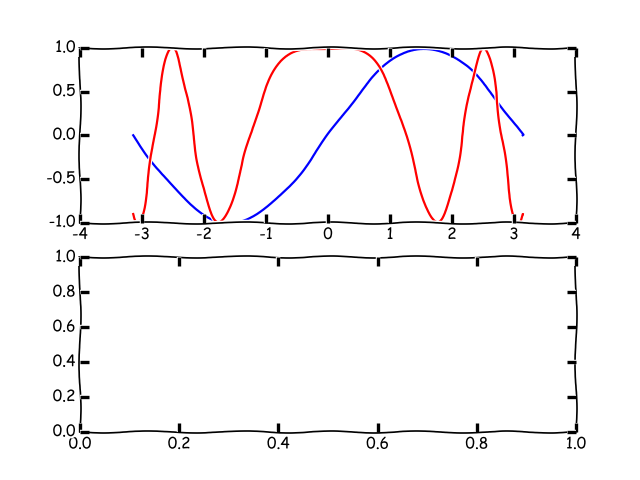

In [6]:
import matplotlib.image as mpimg
plt.gcf()

In [16]:
im = mpimg.imread('./images/kitty.jpeg')
plt.imshow(im)  

So what did just happend?

Things are drawn into somthing called a Figure object.

Because matplotlib is nice to us it implicitly created the figure for our first plot.
Unfortunatly matplotlib can not know how much we actually want to draw into that figure.

New figures are created using:
```
    plt.figure()
```

Commands usually affect the newest figure.
All figures you create are numbered (starting from 1 !)

To select figure 1 for example use:
```
    plt.figure(1)
    ```

## Subplots

Sometimes one would like to display figures side by side

You can use the subplot command to do that
```Python
plt.subplot(nr_of_rows, nr_of_cols, plot_nr)
```

subplot creates a so called Axes object in your figure

this axes object is where you put your plots etc.

## Subplots example

<IPython.core.display.Javascript object>


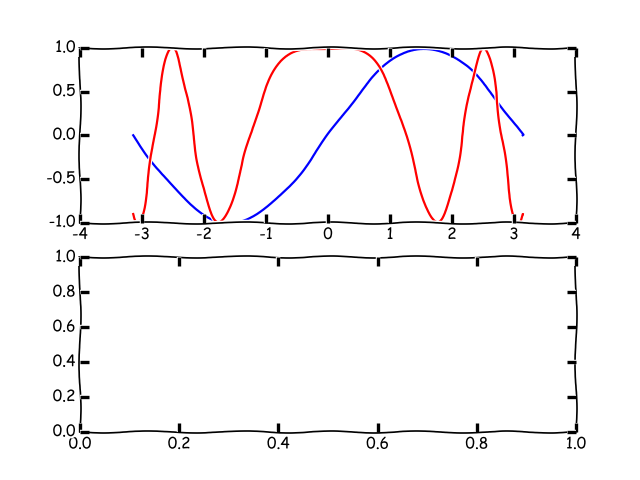

In [4]:
#create a new figure
plt.figure()
#add a subplot, check the documentation for placement rules :-)
plt.subplot(2,1,1)
plt.plot(x,np.sin(x),label='sine')
plt.plot(x,np.cos(x**2),label=r'$\rm{cos}(x^2)$')

In [5]:
#and a new plot for the kitty
plt.subplot(2,1,2)
plt.imshow(im)#in addition: imshow is the weapon of choice to 

NameError: name 'im' is not defined

# Artist layer

![jedi](./jedi.png)

The artist layer is what you should use to do more complicated things.

Like:
 * a phd-thesis
 * scientific papers
 * recreational plotting ...

It is object oriented which helps you to organize your code much better.

In theory you could extend it :-) 

## What is an artist ?

Artists are the basic building blocks of all plots.

Actually the mysterious Figure object itself is an artist.

Artists can be composed of other artists

![figure](./artists_figure.png)
![artist_tree](./artists_tree.png)

let's recreate that plot using the artist layer

<IPython.core.display.Javascript object>


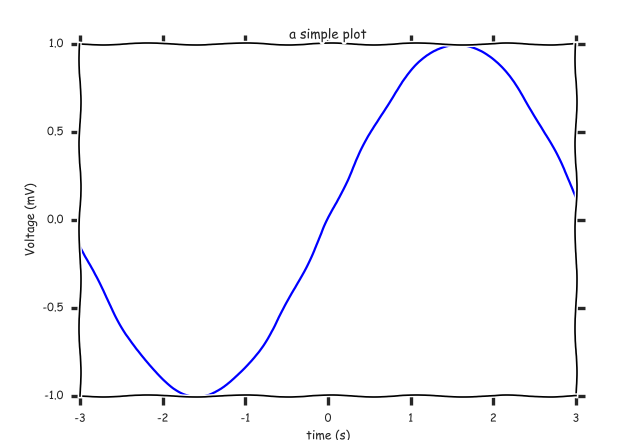

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1 row 1 column plot number 1
ax.plot(x, np.sin(x)) #plot a sine
ax.set_xlim((-3,3))
ax.set_ylim((-1,1))
ax.set_title('a simple plot')
ax.set_xlabel('time (s)')
ax.set_ylabel('Voltage (mV)') 
fig.savefig('./myfig.jpg')

Ok that looks a little bit less cluttered and it is probably easier to modify the figure later on.

But is it really such a big advatage?

<IPython.core.display.Javascript object>


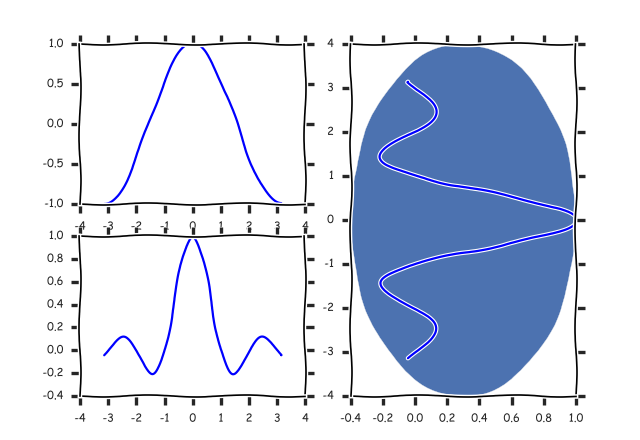

In [58]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2) #this is an object that allows you to specify subplot placement numpy style
fig=plt.figure()
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0]) 
ax3 = fig.add_subplot(gs[:,1])
ax1.plot(x,np.cos(x))
ax2.plot(x,np.sinc(x))
ax3.plot(np.sinc(x),x)

Ok that is nice, now let's customize the plot.

<IPython.core.display.Javascript object>


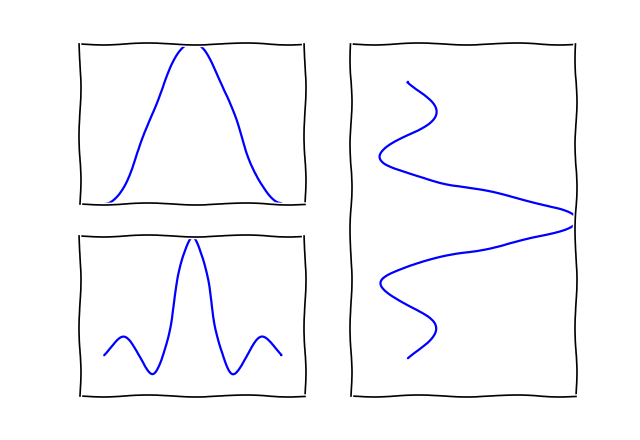

In [36]:
#first the axes ticks are stupid
for ax in [ax1,ax2,ax3]:
    ax.set_xticks([])#change the location of the axis ticks, [] gets rid of them. Read the doc for more
    ax.set_yticks([])
fig


<IPython.core.display.Javascript object>


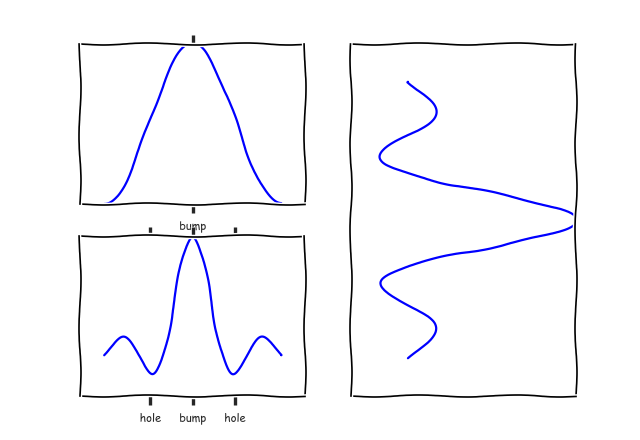

In [37]:
#ok maybe not all of them
ax1.set_xticks([0]) # again this specifies the LOCATIONS of the tics
ax2.set_xticks([-1.5,0,1.5])
ax1.set_xticklabels(['bump']) #this sets the tic text
ax2.set_xticklabels(['hole','bump','hole'])
fig # this is just to draw the figure in this presentation, you do not need it normally

<IPython.core.display.Javascript object>


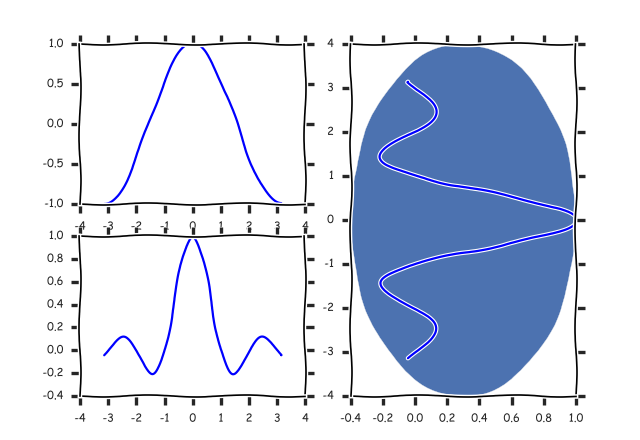

In [60]:
#now ad a funny circle to the plot
#this is just to showcase that apart from plotting and images
#you can add geometric objects and so on
#this can be used to highlight some special area in your plot
circ = plt.Circle((0.5,0.5),0.5,transform=ax3.transAxes)
#the transform arg makes the normaly round circle use the 
ax3.add_patch(circ)
fig
#plt.clf()

## matplotlib styles 

![gloeck](./goeck.jpg) 

For big projects with many plot it is often desireable to create a more or less uniform look.

This can be achieved using matplotlib styles.

The XKCD like plotting you have enjoyed so far is a built in style.

<IPython.core.display.Javascript object>


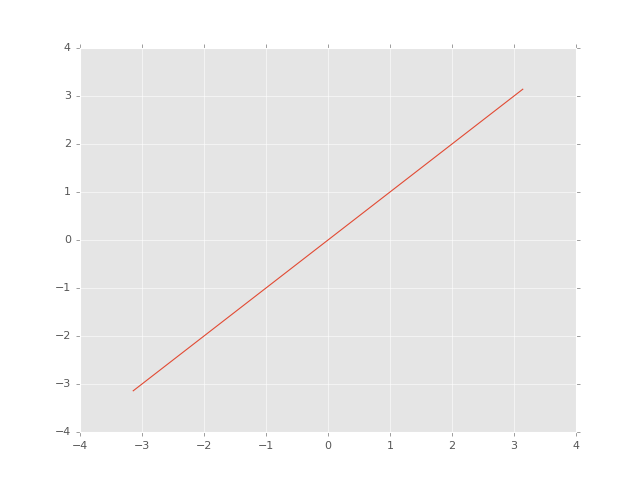

In [22]:
plt.rcdefaults() #kill xkcd like plotting ;-(
plt.style.use('ggplot') #use a more boring plotting style, a list is in the matplotlib doc
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,x)
fig

You can define you own style in a file.

In [23]:
%%file ./my_style
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 13
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16

Writing ./my_style


<IPython.core.display.Javascript object>


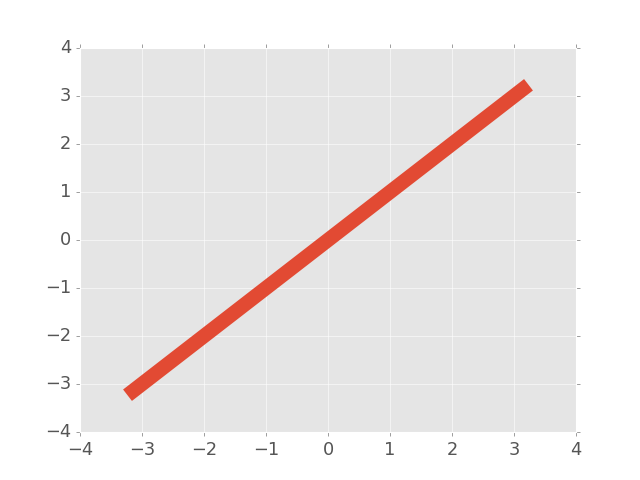

In [24]:
plt.style.use('./my_style')
fig = plt.figure()
plt.plot(x,x)
fig


More about how to write style sheets can be found in the matplotlib documentation.
The keyword is style sheets.




# Seaborn

Seaborne helps you to create fancy graphics for statistics.


To use it properly some knowledge of matplotlib is needed.

A correlation matrix of some data?

In [29]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[:26]))

# Compute the correlation matrix
corr = d.corr()
print(corr.shape)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
f

(26, 26)


TypeError: 'int' object has no attribute '__getitem__'

Want to plot a mean value over time with some nice bootstrap error?

In [30]:
import statsmodels.api as sm
data = sm.datasets.elnino.load_pandas()# this is just to get the data
print(data.data) 

      YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0   1950.0  23.11  24.20  25.37  23.86  23.03  21.57  20.63  20.15  19.67   
1   1951.0  24.19  25.28  25.60  25.37  24.79  24.69  23.86  22.32  21.44   
2   1952.0  24.52  26.21  26.37  24.73  23.71  22.34  20.89  20.02  19.63   
3   1953.0  24.15  26.34  27.36  27.03  25.47  23.49  22.20  21.45  21.25   
4   1954.0  23.02  25.00  25.33  22.97  21.73  20.77  19.52  19.33  18.95   
5   1955.0  23.75  24.82  25.14  24.22  22.16  21.20  20.46  19.63  19.24   
6   1956.0  23.24  24.71  25.90  24.66  23.14  22.04  21.47  20.55  19.89   
7   1957.0  23.13  26.30  27.63  27.15  26.72  25.04  23.83  22.34  21.80   
8   1958.0  24.89  26.55  27.09  26.37  24.71  23.23  22.31  20.72  20.62   
9   1959.0  23.97  25.90  26.94  25.84  24.23  22.57  21.50  20.15  20.23   
10  1960.0  24.40  25.59  26.01  24.66  23.53  21.83  20.73  20.10  20.56   
11  1961.0  24.58  26.66  25.95  25.17  23.60  22.36  20.52  19.97  19.70   

In [31]:
udata = pd.melt(data.data,id_vars=['YEAR'],var_name='MONTH')# massage the data into asuitable form
f, ax = plt.subplots(figsize=(11, 9))
sns.set(color_codes=True)
sns.tsplot(udata,time='YEAR',unit='MONTH',value='value')
f

TypeError: set() got an unexpected keyword argument 'color_codes'

# Some other stuff 

In [28]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Scatter
init_notebook_mode() 
iplot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

ImportError: No module named plotly.offline